***PRICING***

A game company gave gift coins to its users for purchasing items in a game.
Using these virtual coins, users buy various vehicles for their characters.
The game company did not specify a price for an item and provided users to buy this item at the price they wanted.
For example, for the item named shield, users will buy this shield by paying the amounts they see fit.
For example, a user can pay with 30 units of virtual money given to him, while the other user can pay with 45 units.
Therefore, users can buy this item with the amounts they can afford to pay.


Problem to be solved:
1. Does the price of the item differ by category ? Express statistically.
2. What should be the price of the item depending on the first question? Explain why?
3. It is desirable to be "mobile" about the price. Create a decision support system for the price strategy and  simulate their purchases and income for the possible price.

In [23]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import pandas as pd
import itertools
import statsmodels.stats.api as sms
from scipy.stats import shapiro
import scipy.stats as stats
df = pd.read_csv("../input/pricing/pricing kopyas 2.csv" , sep = ";")



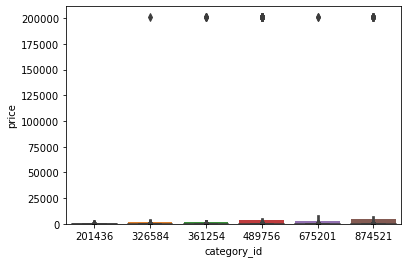

In [24]:
#Visualization (Observation of outliers)
sns.boxplot(x = "category_id" , y = "price" , data = df)
sns.barplot(x = "category_id" , y = "price" , data = df)

In [25]:
#Total number of observations
len(df)

3448

In [26]:
#Detection of lower and upper values of outliers.
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit



def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


replace_with_thresholds(df, "price")

In [27]:
#Calculation of confidence intervals
sms.DescrStatsW(df.price).tconfint_mean()

(42.74026448657552, 44.62467838760549)

In [28]:
#Showing the first two observations.
df.head(2)

,category_id,price
0,489756,32.117753
1,361254,30.711370


In [29]:
#Difference in value between categories.
df.category_id.value_counts()

489756    1705
874521     750
361254     620
326584     145
675201     131
201436      97
Name: category_id, dtype: int64

In [30]:
#Better A / B test results, I equalized all categories.
df_a = df.loc[df.category_id == 489756 , "price"][0:97].reset_index()
df_b = df.loc[df.category_id == 874521 , "price"][0:97].reset_index()
df_c = df.loc[df.category_id == 361254 , "price"][0:97].reset_index()
df_d = df.loc[df.category_id == 326584 , "price"][0:97].reset_index()
df_e = df.loc[df.category_id == 675201 , "price"][0:97].reset_index()
df_f = df.loc[df.category_id == 201436 , "price"][0:97].reset_index()

In [31]:
#Collation of categories on a column basis. (Preparation for A / B test.)
dff = pd.concat([df_a, df_b, df_c , df_d , df_e , df_f] ,axis = 1)
dff = dff.iloc[:,[1,3,5,7,9,11]]

dff.columns = ["489756","874521","361254","326584","675201","201436"]
dff.head(2)

,489756,874521,361254,326584,675201,201436
0,32.117753,66.323935,30.711370,30.000000,32.845208,30.000000
1,34.543840,34.597899,31.572607,31.904145,31.432038,32.653464


#KENDİME NOT


"bes","alti","yedi","sekiz"]
import numpy as np
df_2 = pd.cut(range(0,3448), 8,
       labels=["bir","iki","uc","dort","bes","alti","yedi","sekiz"], ordered=False)
df_2 = pd.DataFrame(df_2)
df_2.columns = ["category_1"]
type(df_2)

In [32]:
#Searching for missing values
dff.isnull().sum()

489756    0
874521    0
361254    0
326584    0
675201    0
201436    0
dtype: int64

# Performing Two Independent Samples T Test (A / B TESTING)

Two assumptions must be met in order to perform A / B testing.

- 1-Normality Assumption
- 2-Variance Homogeneity

Let's test this by crossing the categories to check if it meets the assumptions.

Note :
*** Interpretation of the hypotheses according to the pvalue value: ***
- H0 cannot be rejected if the pvalue value is greater than 0.05.
- If the pvalue value is less than 0.05, H0 is rejected.


**1st Assumption of Abnormality**
- H0: Normal distribution assumption is provided.
- H1: Normal distribution assumption is not provided.


***Evaluation of normality assumption results***
- In all crossings, H0 is rejected because the pvalue value is less than 0.05. That is, the normal distribution assumption is not provided. Therefore, we will do the nonparametric test (Mann-Whitney U test).

In [33]:
#The conjecture of normality. H0 is rejected because the pvalue value is less than 0.05 in all crossings. That is, the normal distribution assumption is not provided.
items = ["489756","874521","361254","326584","675201","201436"]
a = [(items[i],items[j]) for i in range(len(items)) for j in range(i+1, len(items))]

for i in range(0,15):
    print(a[i][0] , "ve" , a[i][1])
    df_a = dff[a[i][0]]
    #df_a = df_a.reset_index()
    df_a.columns = ["A"]
    df_b = dff[a[i][1]]
    #df_b = df_b.reset_index()
    df_b.columns = ["B"]
    print('Test Statistics = %.4f, p-value = %.4f' % shapiro(df_a))
    print('Test Statistics = %.4f, p-value = %.4f' % shapiro(df_b))

489756 ve 874521
Test Statistics = 0.5702, p-value = 0.0000
Test Statistics = 0.4660, p-value = 0.0000
489756 ve 361254
Test Statistics = 0.5702, p-value = 0.0000
Test Statistics = 0.3723, p-value = 0.0000
489756 ve 326584
Test Statistics = 0.5702, p-value = 0.0000
Test Statistics = 0.3509, p-value = 0.0000
489756 ve 675201
Test Statistics = 0.5702, p-value = 0.0000
Test Statistics = 0.4479, p-value = 0.0000
489756 ve 201436
Test Statistics = 0.5702, p-value = 0.0000
Test Statistics = 0.6190, p-value = 0.0000
874521 ve 361254
Test Statistics = 0.4660, p-value = 0.0000
Test Statistics = 0.3723, p-value = 0.0000
874521 ve 326584
Test Statistics = 0.4660, p-value = 0.0000
Test Statistics = 0.3509, p-value = 0.0000
874521 ve 675201
Test Statistics = 0.4660, p-value = 0.0000
Test Statistics = 0.4479, p-value = 0.0000
874521 ve 201436
Test Statistics = 0.4660, p-value = 0.0000
Test Statistics = 0.6190, p-value = 0.0000
361254 ve 326584
Test Statistics = 0.3723, p-value = 0.0000
Test Statisti

**2- Variance Homogeneity Assumption**

***The hypothesis established on the assumption of variance homogeneity:***

- H0: Variances are Homogeneous.
- H1: Variances Are Not Homogeneous.

***Evaluation of variance homogeneity:***


H0 cannot be rejected as all pvalue values are greater than 0.05 as a result of cross over between groups. So Variances are homogeneous. As an exception, it was determined that 489756 and 201436 groups did not provide variance homogeneity in crossing.

In [34]:
#Variance homogeneity (all variances are distributed homogeneously.)

items = ["489756","874521","361254","326584","675201","201436"]
a = [(items[i],items[j]) for i in range(len(items)) for j in range(i+1, len(items))]

for i in range(0,15):
    print(a[i][0] , "ve" , a[i][1] )
    print('Test Statistics = %.4f, p-value = %.4f' % stats.levene(dff[a[i][0]], dff[a[i][1]]))
    
    p = stats.levene(dff[a[i][0]], dff[a[i][1]])
    if p[1] < 0.05:
        print(a[i][0] , "and" , a[i][1] , " h0 is rejected because the p value is less than 0.05. In other words, variances are not distributed homogeneously.")
    else:
        print(a[i][0] , "and" , a[i][1] , " h0 cannot be rejected because the p value is greater than 0.05. That is, variances are distributed homogeneously.")

489756 ve 874521
Test Statistics = 0.6148, p-value = 0.4339
489756 and 874521  h0 cannot be rejected because the p value is greater than 0.05. That is, variances are distributed homogeneously.
489756 ve 361254
Test Statistics = 0.4225, p-value = 0.5165
489756 and 361254  h0 cannot be rejected because the p value is greater than 0.05. That is, variances are distributed homogeneously.
489756 ve 326584
Test Statistics = 2.5120, p-value = 0.1146
489756 and 326584  h0 cannot be rejected because the p value is greater than 0.05. That is, variances are distributed homogeneously.
489756 ve 675201
Test Statistics = 1.1076, p-value = 0.2939
489756 and 675201  h0 cannot be rejected because the p value is greater than 0.05. That is, variances are distributed homogeneously.
489756 ve 201436
Test Statistics = 7.1457, p-value = 0.0082
489756 and 201436  h0 is rejected because the p value is less than 0.05. In other words, variances are not distributed homogeneously.
874521 ve 361254
Test Statistics =

# Hypotheses of A / B testing
- H0: There is no statistically significant difference between the average purchase amount of the two groups.
- H1: There is a statistically significant difference between the average purchase amount of the two groups.

***Pairs with statistically significant differences:***
- 489756 and 874521
- 489756 and 361254
- 489756 and 326584
- 489756 and 675201
- 489756 and 201436
- 874521 and 326584
- 361254 and 326584
- 326584 and 675201
- 326584 and 201436

H0 is rejected because the pvalue values of the above cross-categories are less than 0.05. That is, there is a statistically significant difference between the average purchase amount of the two groups.

In [35]:
#Since there is no normality in all crossings, we will do the nonparametric test (Mann-Whitney U test).

items = ["489756","874521","361254","326584","675201","201436"]
a = [(items[i],items[j]) for i in range(len(items)) for j in range(i+1, len(items))]


for i in range(0,15):
    print(a[i][0] , "and" , a[i][1] )
    p = stats.stats.mannwhitneyu(dff[a[i][0]] , dff[a[i][1]])
    
    if p[1] < 0.05:
        print("-"*100)
        print(a[i][0] , "and" , a[i][1] , "Since the p-value is less than 0.05, H0 is rejected.")
        
        
        print("-"*100)
    else:
        print("H0 cannot be rejected because the p value is greater than 0.05. ")
        
 

489756 and 874521
----------------------------------------------------------------------------------------------------
489756 and 874521 Since the p-value is less than 0.05, H0 is rejected.
----------------------------------------------------------------------------------------------------
489756 and 361254
----------------------------------------------------------------------------------------------------
489756 and 361254 Since the p-value is less than 0.05, H0 is rejected.
----------------------------------------------------------------------------------------------------
489756 and 326584
----------------------------------------------------------------------------------------------------
489756 and 326584 Since the p-value is less than 0.05, H0 is rejected.
----------------------------------------------------------------------------------------------------
489756 and 675201
----------------------------------------------------------------------------------------------------
489756 a

# Does the price of the item differ by category? Express it statistically.

- The value given to item varies between categories. When we cross the categories among themselves and put them in an independent sample T test; H0 hypothesis is rejected because the pvalue value of the following binary groups is less than 0.05. In other words, when we compare the mean of the groups (the two pairs below), it is seen that they are different from each other in a way that is not by chance.


- 489756 and 874521
- 489756 and 361254
- 489756 and 326584
- 489756 and 675201
- 489756 and 201436
- 874521 and 326584
- 361254 and 326584
- 326584 and 675201
- 326584 and 201436

As a result of the AB test, it is observed that there is a difference in the averages of the above binary groups.

# Depending on the first question, what should the item cost? Explain why?
- As seen below, this can be chosen since the average amount of all categories is 36. Because there was statistical difference in the average of only two pairs in the crossings we made. So even if we take the average of these groups, it will not represent all groups. Therefore, I took the average of all amounts. However, since this did not help me predict events that could be by chance, I decided to look at the confidence intervals.

In [36]:
#Taking averages.

dff.mean().mean()

39.10015049509575

In [37]:
#Looking at descriptive statistics.

dff.describe().T

,count,mean,std,min,25%,50%,75%,max
489756,97.0,42.937450,21.845845,30.0,32.117753,34.891946,44.604229,187.445544
874521,97.0,39.648290,20.502815,30.0,30.915493,33.828879,35.892906,187.445544
361254,97.0,40.117515,25.501210,30.0,30.999253,34.003999,35.170468,187.445544
326584,97.0,36.401966,18.345479,30.0,30.000000,31.525926,35.000000,187.445544
675201,97.0,39.320184,19.393426,30.0,31.382515,34.026924,36.684999,187.445544
201436,97.0,36.175498,8.900154,30.0,31.487818,33.534678,35.919947,74.452929


# It is desirable to be "mobile" on the price. Create a decision support system for price strategy and simulate item purchases and revenues for possible price changes.

In [38]:
#Creating a movable gap.

sms.DescrStatsW(df.price).tconfint_mean()

(42.74026448657552, 44.62467838760549)




Finding confidence intervals (42.74026448657552, 44.62467838760549)

# Income Simulation

If we take into account the confidence intervals, we need to make 3 types of price strategies. We can start calculating the income we will get as a result of these strategies.


In [39]:
#one. step: calculating the income to be obtained from those who want to buy under 42 units.
frekans = len(df.loc[df.price < 42])
gelir = frekans * 42
gelir


109746


- The revenue to be obtained is 109746 units.

In [40]:

#2nd step: calculate the income from those who want to buy between 42 and 44 units

frekans_2 = len(df.loc[(df.price >= 42) & (df.price < 44)])
gelir = frekans_2 * 43
gelir

4257


- The revenue to be obtained is 4257 units.

In [41]:
#3- step: calculating the income from those who want to buy more than 44 units
frekans_3 = len(df.loc[(df.price >= 44)])
gelir = frekans_3 * 44
gelir

32384


- The revenue to be obtained is 32384 units.